In [121]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# - Part I

In [123]:
titres = ["XOM", "AAPL", "MSFT", "IBM", "GOOGL", "CVX", "WMT", "GS", "GE", "PG"] #titres 2010
data = yf.download(titres, start="2023-01-01", end="2024-01-01", interval="1d") #période et fréquence des données
portfolio_returns = data['Adj Close'].pct_change().mean(axis=1) #portfolio return

[*********************100%%**********************]  10 of 10 completed


In [124]:
data.head()

Price        Adj Close                                                \
Ticker            AAPL         CVX         GE      GOOGL          GS   
Date                                                                   
2023-01-03  123.904633  163.949631  52.601933  89.017838  331.218292   
2023-01-04  125.182610  162.206390  55.663589  87.979027  332.634155   
2023-01-05  123.855095  165.127502  56.527874  86.101181  328.864838   
2023-01-06  128.412216  166.371307  57.043285  87.239868  332.997650   
2023-01-09  128.937286  165.070953  57.622120  87.919090  337.704468   

Price                                                                  ...  \
Ticker             IBM        MSFT          PG        WMT         XOM  ...   
Date                                                                   ...   
2023-01-03  131.173416  236.609207  145.074844  46.825424  101.223038  ...   
2023-01-04  132.146454  226.259186  145.706558  46.877594  101.517654  ...   
2023-01-05  130.765656  219.553375  143.897552  46.717823  103.789009  ...   
2023-01-06  133.165787  222.140869  147.324127  47.862366  105.043488  ...   
2023-01-09  133.026779  224.303711  145.524689  47.265633  103.085732  ...   

Price          Volume                                                 \
Ticker           AAPL      CVX        GE     GOOGL       GS      IBM   
Date                                                                   
2023-01-03  112117500  7565400  10280781  28131200  1589700  3338600   
2023-01-04   89113600  7684500  21031104  34854800  1881000  3869200   
2023-01-05   80962700  6088200  16001061  27194400  1397800  2866600   
2023-01-06   87754700  7191200  13018044  41381500  3097800  3574000   
2023-01-09   70790800  8385600   9488844  29003900  1989000  3987700   

Price                                              
Ticker          MSFT       PG       WMT       XOM  
Date                                               
2023-01-03  25740000  6447300  17249700  15146200  
2023-01-04  50623400  7313400  13338300  18058400  
2023-01-05  39585600  5373800  13274400  15946600  
2023-01-06  43613600  7882200  21231900  16348100  
2023-01-09  27369800  5727000  17756700  17964600  

[5 rows x 60 columns]

In [125]:
# benchmark (SP500)

benchmark = yf.download("^GSPC", start="2023-01-01", end="2024-01-01", interval="1d")
benchmark_returns = benchmark['Adj Close'].pct_change() #benchmark return

[*********************100%%**********************]  1 of 1 completed


In [126]:
# Rendement cumulative pour obtenir les perfs cumulées

cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod() - 1

In [127]:
# Appliquons une pondération 

# Répartition égale de 10 % pour chaque titre
weights = np.array([0.10] * len(titres))

# performance annuelle (variation des prix sur l'année)
initial_prices = data['Adj Close'].iloc[0]
final_prices = data['Adj Close'].iloc[-1]
annual_performance = (final_prices - initial_prices) / initial_prices

# DataFrame
summary_df = pd.DataFrame({
    'Ticker': titres,
    'Poids (%)': weights * 100,
    'Performance Annuelle (%)': annual_performance * 100
})

#tableau récapitulatif
summary_df.reset_index(drop=True, inplace=True)
print(summary_df)

  Ticker  Poids (%)  Performance Annuelle (%)
0    XOM       10.0                 54.798223
1   AAPL       10.0                -10.902562
2   MSFT       10.0                 92.971700
3    IBM       10.0                 56.743710
4  GOOGL       10.0                 14.954787
5    CVX       10.0                 21.280623
6    WMT       10.0                 58.349744
7     GS       10.0                 -0.864212
8     GE       10.0                 11.458636
9     PG       10.0                 -2.925991


In [128]:
# Performance finale du portefeuille et du benchmark en pourcentage
portfolio_performance_percent = cumulative_portfolio_returns.iloc[-1] * 100
benchmark_performance_percent = cumulative_benchmark_returns.iloc[-1] * 100

print(f"Performance du Portefeuille sur la période : {portfolio_performance_percent:.2f}%")
print(f"Performance du Benchmark (CAC 40) sur la période : {benchmark_performance_percent:.2f}%")

Performance du Portefeuille sur la période : 28.01%
Performance du Benchmark (CAC 40) sur la période : 24.73%


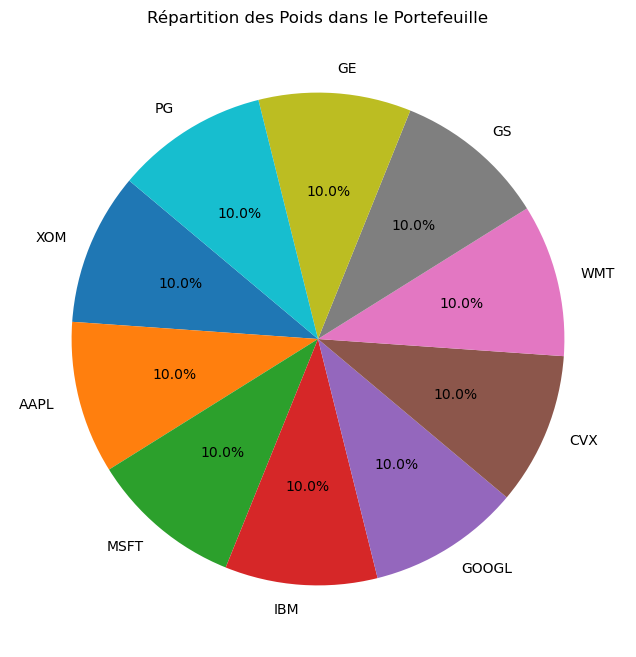

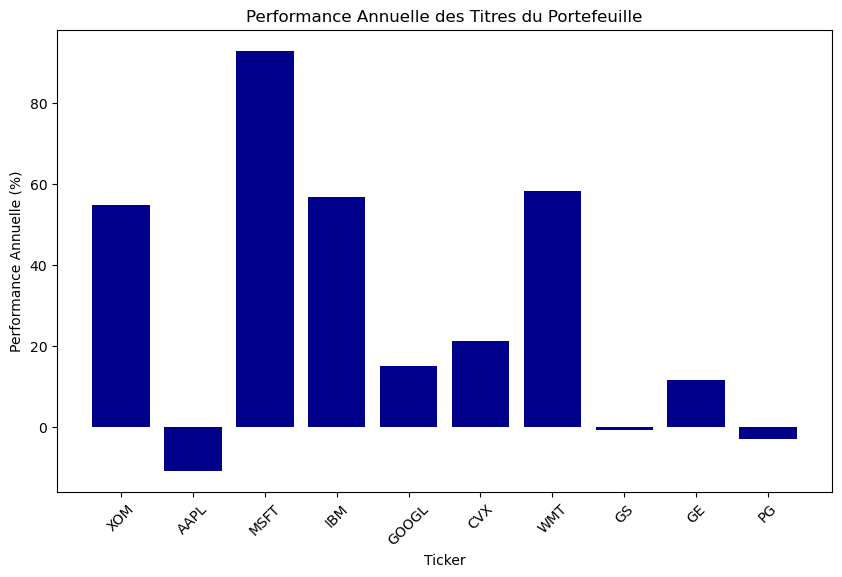

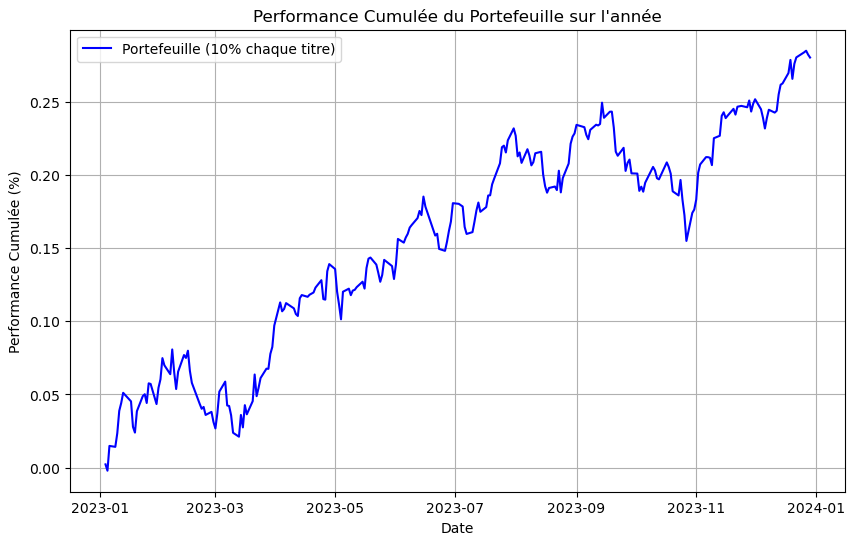

In [129]:
# 1. Diagramme circulaire pour la répartition des poids
plt.figure(figsize=(8, 8))
plt.pie(summary_df['Poids (%)'], labels=summary_df['Ticker'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Poids dans le Portefeuille')
plt.show()

# 2. Diagramme en barres pour la performance annuelle
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Ticker'], summary_df['Performance Annuelle (%)'], color='darkblue')
plt.title('Performance Annuelle des Titres du Portefeuille')
plt.xlabel('Ticker')
plt.ylabel('Performance Annuelle (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Graphique de performance cumulée (si vous avez les rendements quotidiens)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille (10% chaque titre)', color='blue')
plt.title('Performance Cumulée du Portefeuille sur l\'année')
plt.xlabel('Date')
plt.ylabel('Performance Cumulée (%)')
plt.legend()
plt.grid(True)
plt.show()

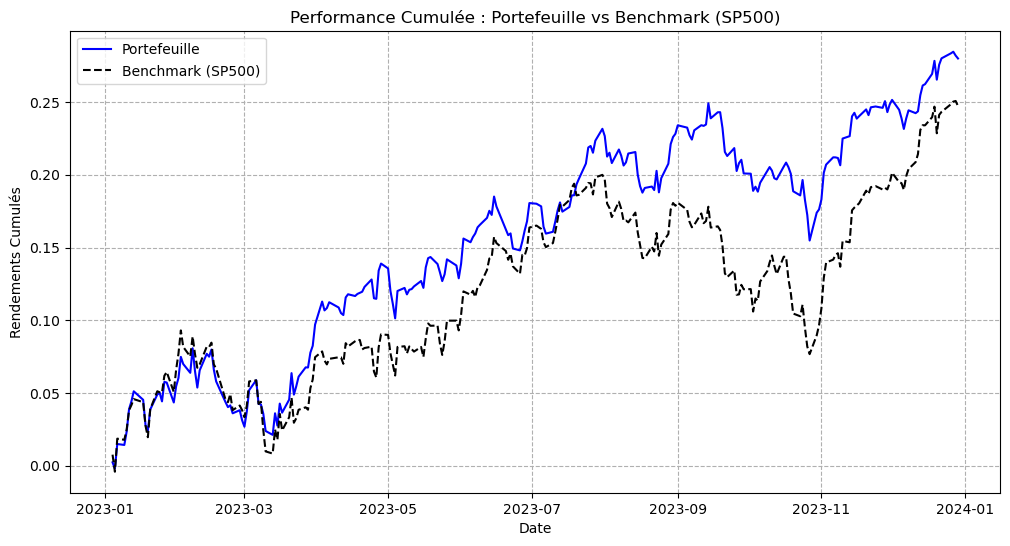

In [130]:
# Comparaison vs Benchmark

# Perf cumulées
plt.figure(figsize=(12, 6))
plt.plot(cumulative_portfolio_returns, label='Portefeuille', color='blue')
plt.plot(cumulative_benchmark_returns, label='Benchmark (SP500)', color='black', linestyle='--')
plt.title('Performance Cumulée : Portefeuille vs Benchmark (SP500)')
plt.xlabel('Date')
plt.ylabel('Rendements Cumulés')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

  Ticker  Contribution
0    XOM      5.479823
1   AAPL     -1.090255
2   MSFT      9.297171
3    IBM      5.674371
4  GOOGL      1.495480
5    CVX      2.128064
6    WMT      5.834973
7     GS     -0.086422
8     GE      1.145863
9     PG     -0.292599

La somme des contributions est : 29.586469


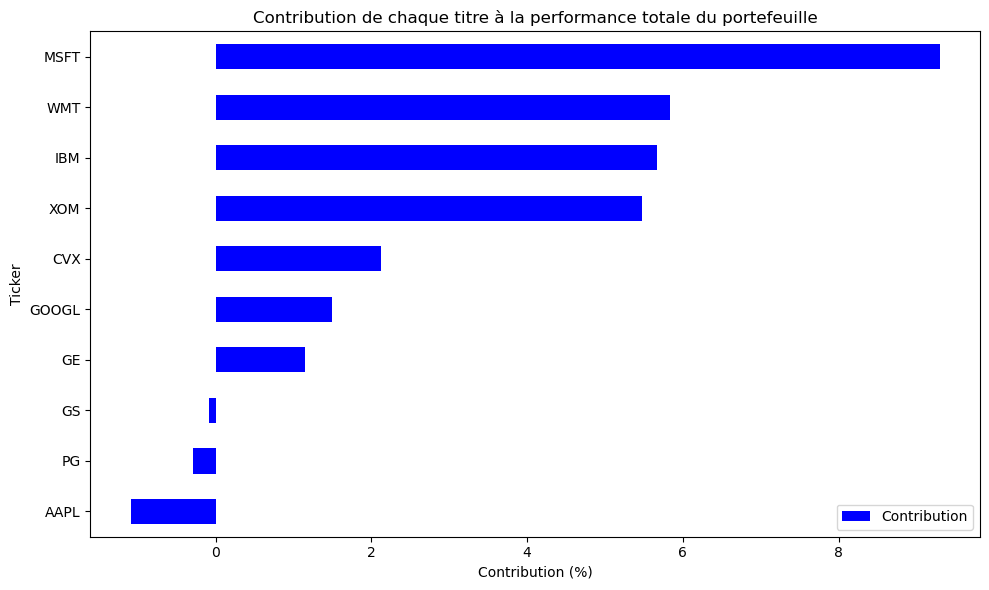

In [131]:
# Contribution de perf


# Ticker, Poids (%) et Performance Annuelle (%)
data = {
    'Ticker': ['XOM', 'AAPL', 'MSFT', 'IBM', 'GOOGL', 'CVX', 'WMT', 'GS', 'GE', 'PG'],
    'Poids (%)': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
    'Performance Annuelle (%)': [54.798233, -10.902554, 92.971714, 56.743710, 14.954797, 21.280637, 58.349734, -0.864222, 11.458627, -2.925991]
}

# Conversion en DataFrame
summary_df = pd.DataFrame(data)
summary_df['Contribution'] = (summary_df['Poids (%)'] / 100) * summary_df['Performance Annuelle (%)']
total_contribution = summary_df['Contribution'].sum()
print(summary_df[['Ticker', 'Contribution']])
print(f"\nLa somme des contributions est : {total_contribution:.6f}")

fig, ax = plt.subplots(figsize=(10, 6))
summary_df.sort_values('Contribution', ascending=True).plot(kind='barh', x='Ticker', y='Contribution', ax=ax, color='blue')
ax.set_title('Contribution de chaque titre à la performance totale du portefeuille')
ax.set_xlabel('Contribution (%)')
ax.set_ylabel('Ticker')
ax.grid(False)
plt.tight_layout()
plt.show()

# Composition de notre portefeuille

Notre portefeuille est composé des titres suivants :

| Ticker     | Entreprise           | Poids dans le portefeuille | Contribution (%) |
|------------|----------------------|----------------------------|------------------|
| **XOM**    | ExxonMobil           | 10%                        | 5.4798           |
| **AAPL**   | Apple                | 10%                        | -1.0903          |
| **MSFT**   | Microsoft            | 10%                        | 9.2972           |
| **IBM**    | IBM                  | 10%                        | 5.6744           |
| **GOOGL**  | Alphabet (Google)    | 10%                        | 1.4955           |
| **CVX**    | Chevron              | 10%                        | 2.1281           |
| **WMT**    | Walmart              | 10%                        | 5.8350           |
| **GS**     | Goldman Sachs        | 10%                        | -0.0864          |
| **GE**     | General Electric     | 10%                        | 1.1459           |
| **PG**     | Procter & Gamble     | 10%                        | -0.2926          |

**Poids total** : 100% investi en actions

**Période de placement** : 2023 - 2024 (Janv. vs Janv)

**Performance du portefeuille** : + 28.01 %

**Performance du benchmark** : + 24.74 %

# - Part II : Analyse Quantitative de la Performance Historique


In [134]:
# Corrected approach to backtest the portfolio with weights considered

# Step 1: Define the tickers and weights for your portfolio
tickers = ["XOM", "AAPL", "MSFT", "IBM", "GOOGL", "CVX", "WMT", "GS", "GE", "PG"] 
# Risk-free rate for Sharpe Ratio (assume 0% for simplicity)
risk_free_rate = 0.01

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


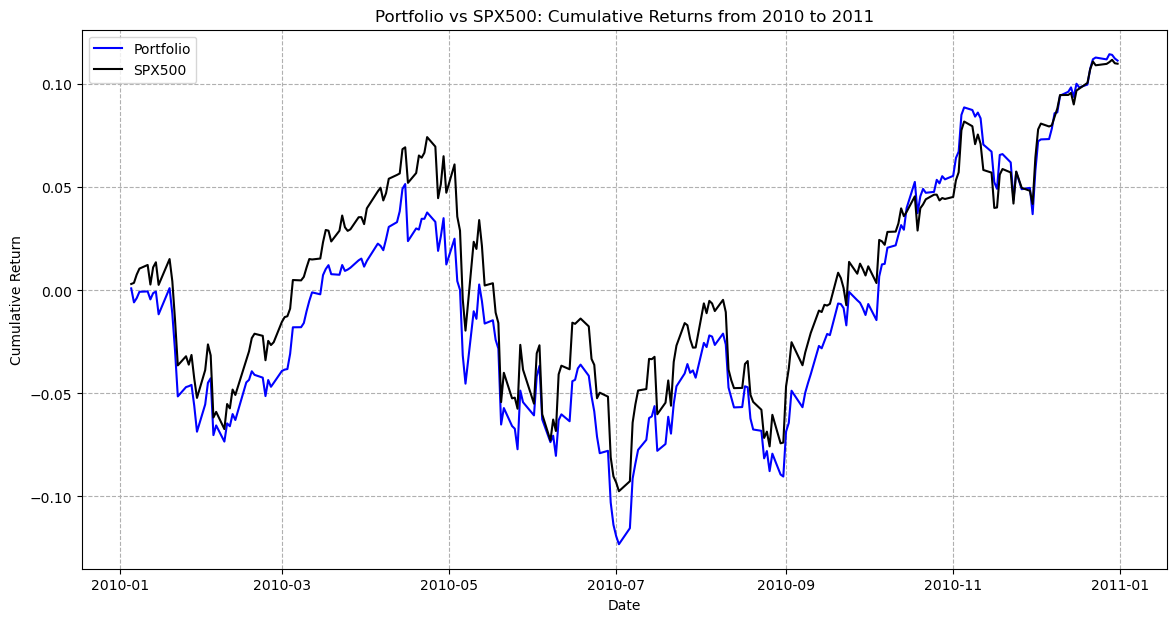

[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2010 à 2011 : 11.15%
Performance du Benchmark (SPX500) de 2010 à 2011 : 11.00%

Sharpe Ratio du Portefeuille de 2010 à 2011 : -0.93
Sharpe Ratio du Benchmark (SPX500) de 2010 à 2011 : -0.84



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


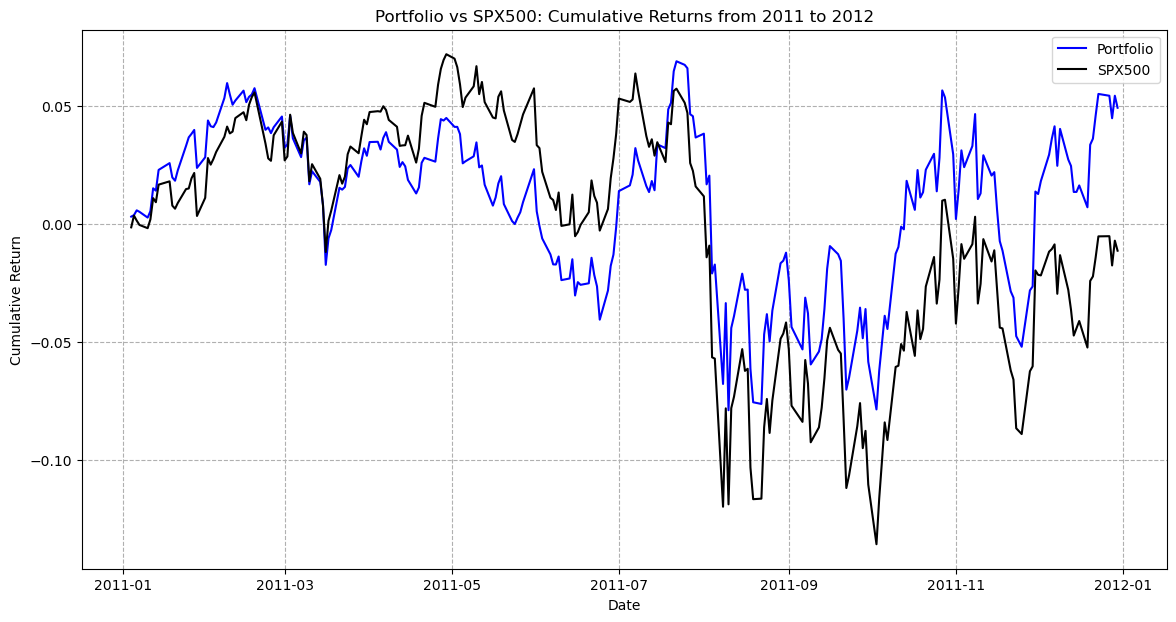

[**********************50%%                      ]  5 of 10 completed

Performance du Portefeuille de 2011 à 2012 : 4.94%
Performance du Benchmark (SPX500) de 2011 à 2012 : -1.12%

Sharpe Ratio du Portefeuille de 2011 à 2012 : -0.76
Sharpe Ratio du Benchmark (SPX500) de 2011 à 2012 : -0.68



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


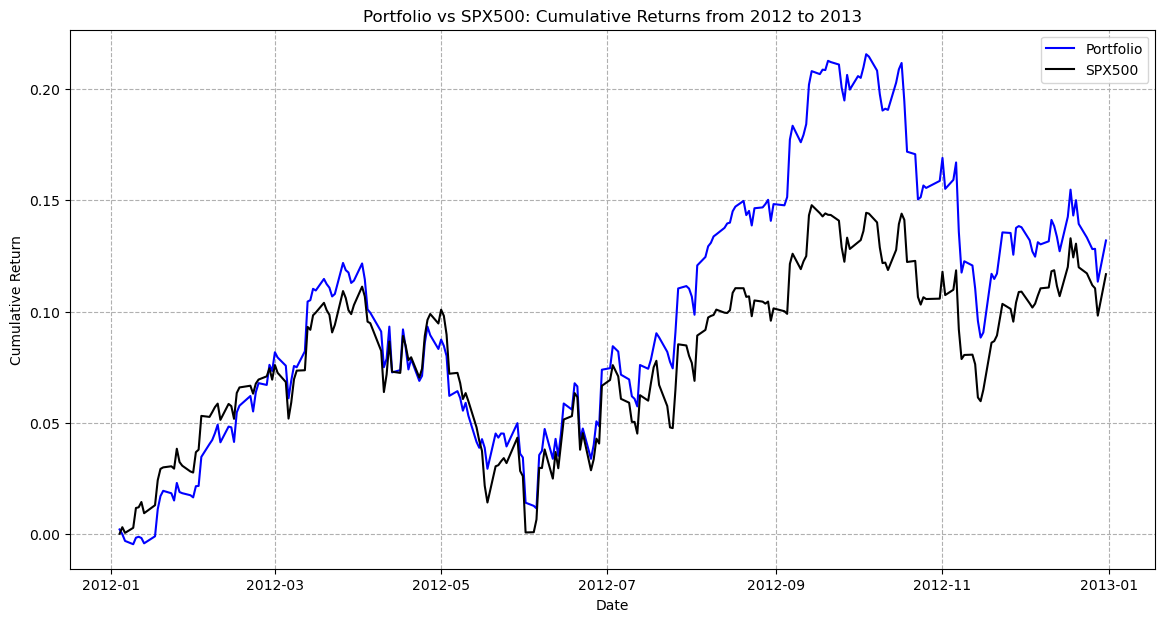

[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2012 à 2013 : 13.19%
Performance du Benchmark (SPX500) de 2012 à 2013 : 11.68%

Sharpe Ratio du Portefeuille de 2012 à 2013 : -1.16
Sharpe Ratio du Benchmark (SPX500) de 2012 à 2013 : -1.19



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


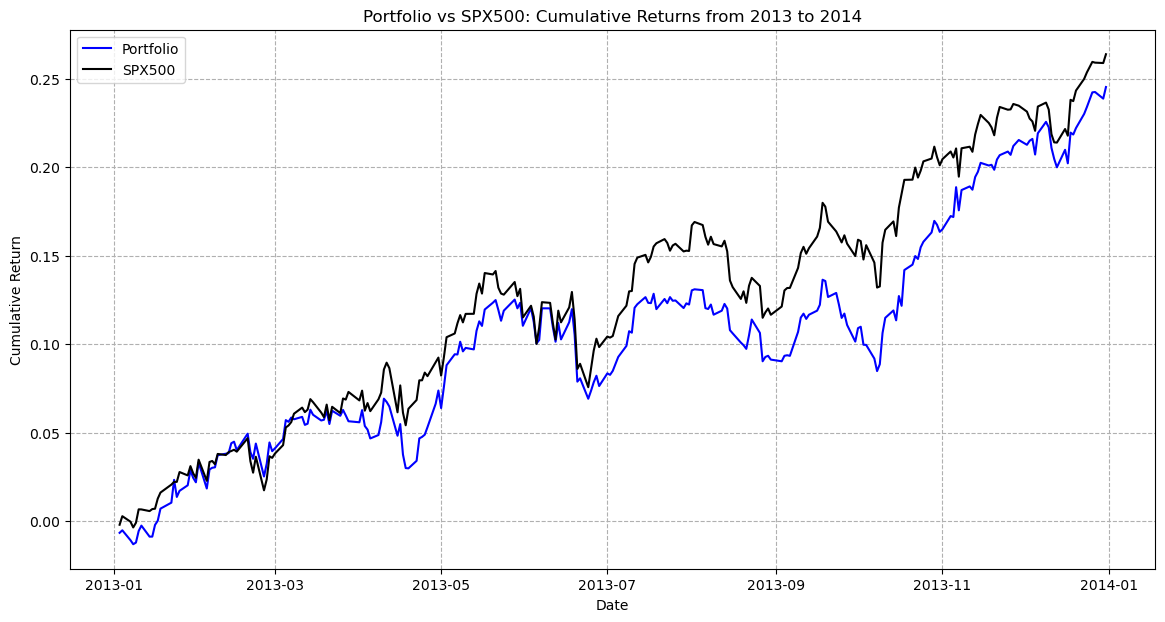

[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2013 à 2014 : 24.54%
Performance du Benchmark (SPX500) de 2013 à 2014 : 26.39%

Sharpe Ratio du Portefeuille de 2013 à 2014 : -1.38
Sharpe Ratio du Benchmark (SPX500) de 2013 à 2014 : -1.33



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


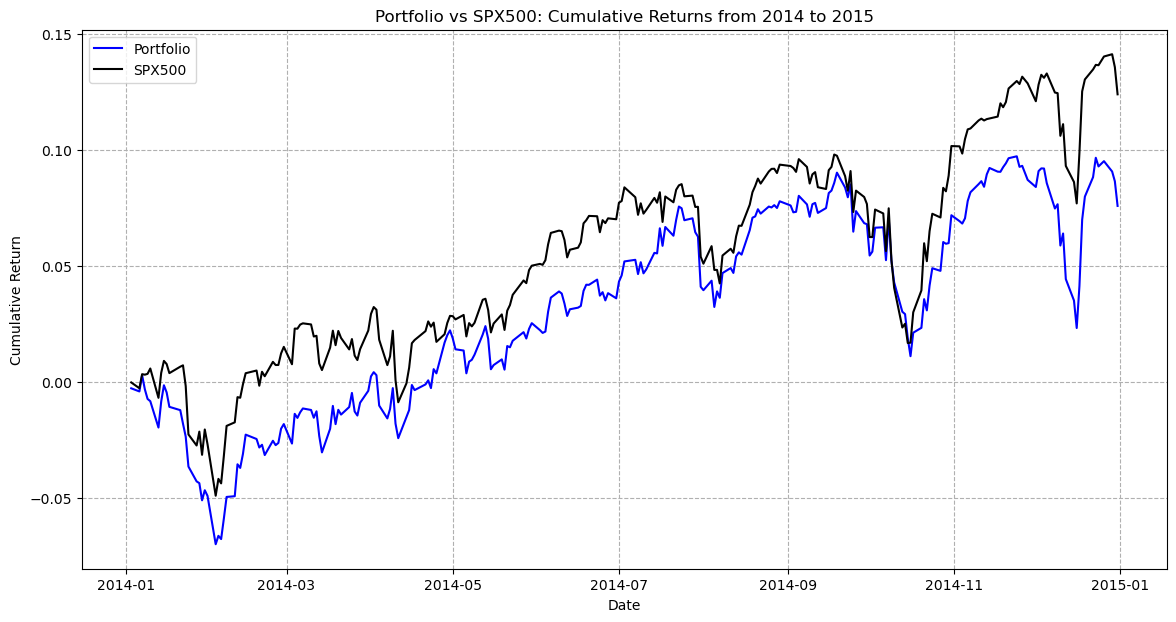

[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2014 à 2015 : 7.58%
Performance du Benchmark (SPX500) de 2014 à 2015 : 12.39%

Sharpe Ratio du Portefeuille de 2014 à 2015 : -1.40
Sharpe Ratio du Benchmark (SPX500) de 2014 à 2015 : -1.33



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


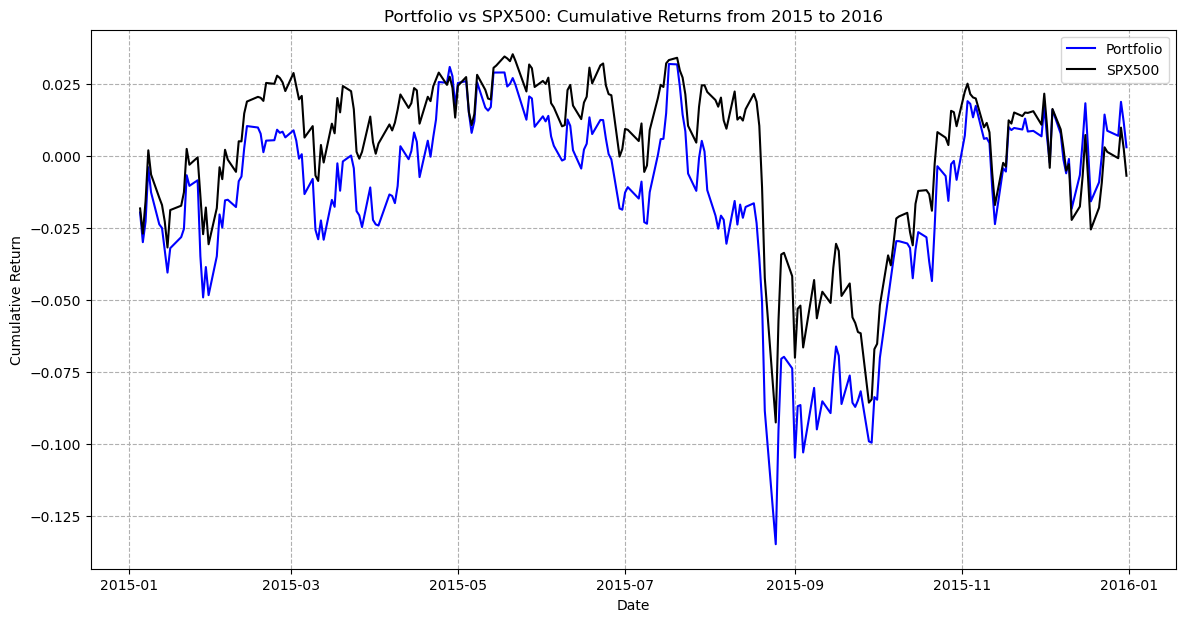

[**************        30%%                      ]  3 of 10 completed

Performance du Portefeuille de 2015 à 2016 : 0.30%
Performance du Benchmark (SPX500) de 2015 à 2016 : -0.69%

Sharpe Ratio du Portefeuille de 2015 à 2016 : -0.92
Sharpe Ratio du Benchmark (SPX500) de 2015 à 2016 : -1.02



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


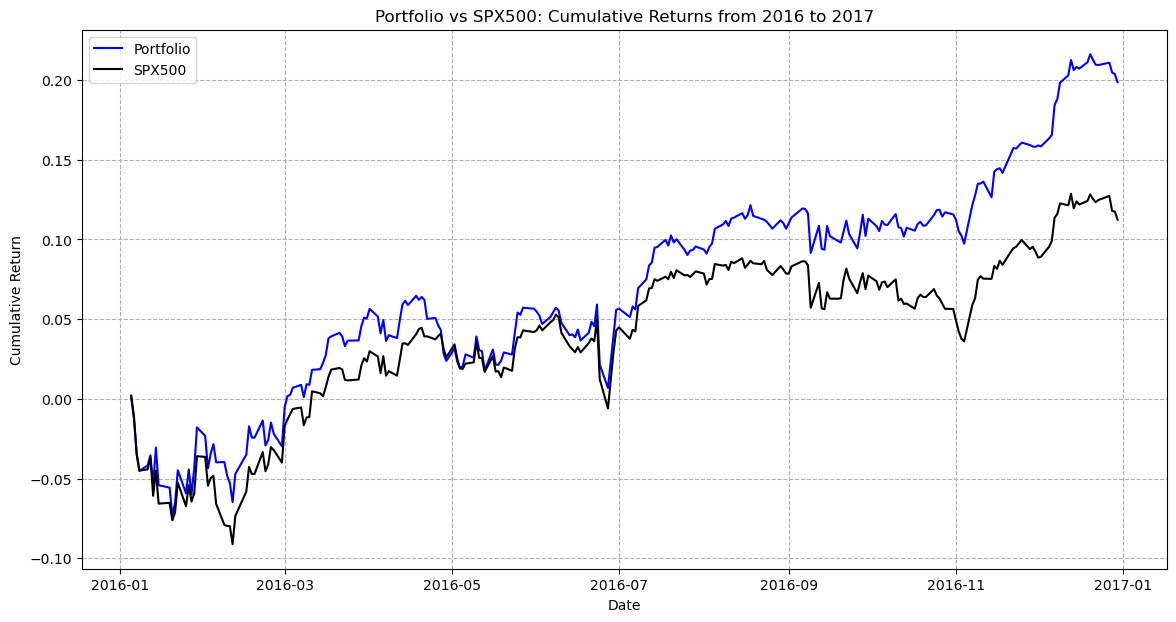

[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2016 à 2017 : 19.87%
Performance du Benchmark (SPX500) de 2016 à 2017 : 11.24%

Sharpe Ratio du Portefeuille de 2016 à 2017 : -1.08
Sharpe Ratio du Benchmark (SPX500) de 2016 à 2017 : -1.16



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


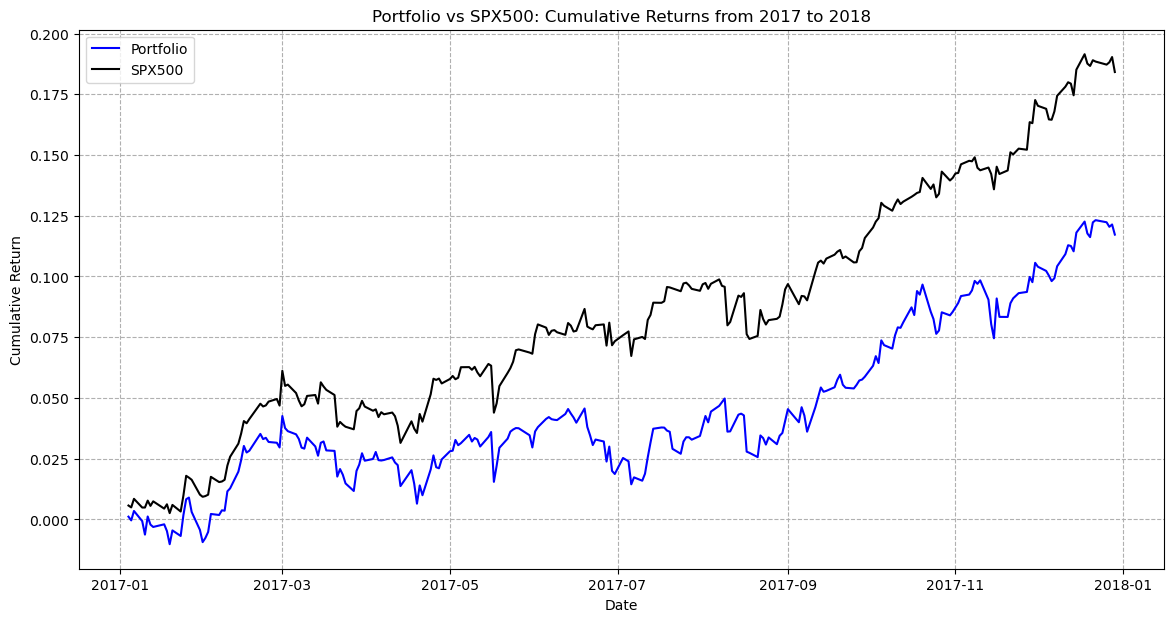

[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2017 à 2018 : 11.72%
Performance du Benchmark (SPX500) de 2017 à 2018 : 18.42%

Sharpe Ratio du Portefeuille de 2017 à 2018 : -2.08
Sharpe Ratio du Benchmark (SPX500) de 2017 à 2018 : -2.22



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


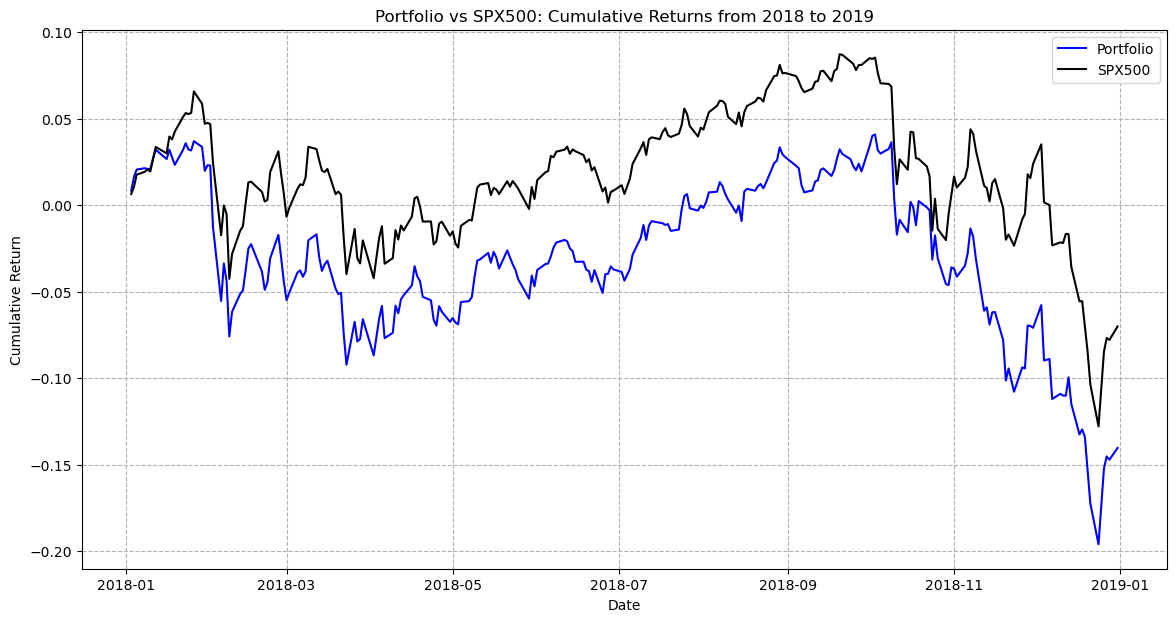

[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2018 à 2019 : -14.03%
Performance du Benchmark (SPX500) de 2018 à 2019 : -7.01%

Sharpe Ratio du Portefeuille de 2018 à 2019 : -0.92
Sharpe Ratio du Benchmark (SPX500) de 2018 à 2019 : -0.95



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


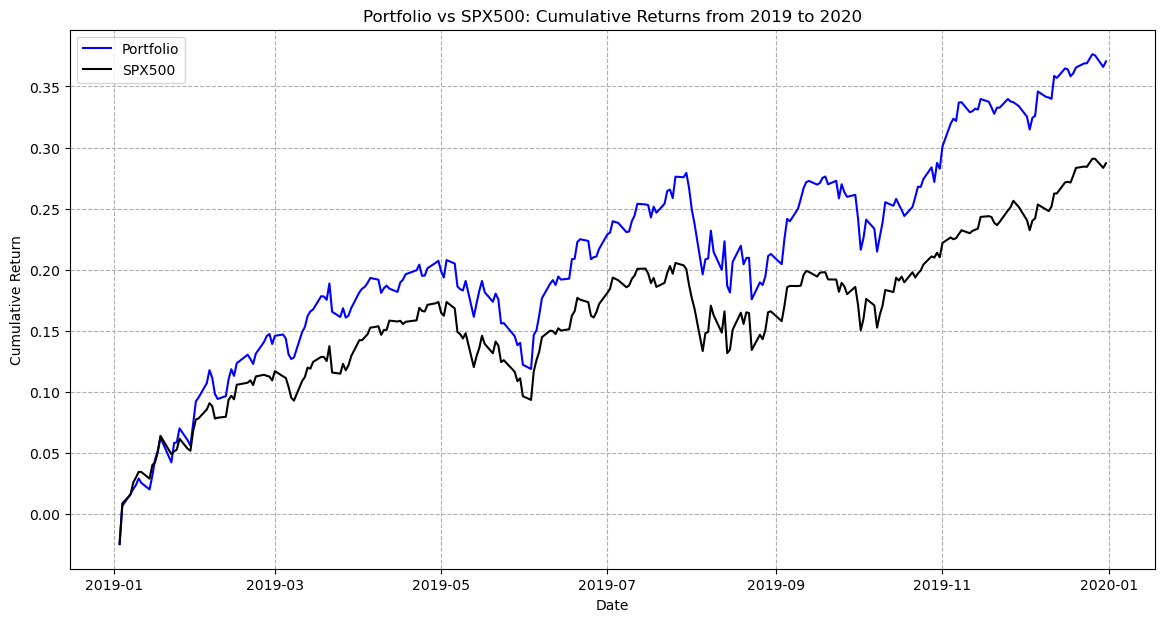

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2019 à 2020 : 37.06%
Performance du Benchmark (SPX500) de 2019 à 2020 : 28.71%

Sharpe Ratio du Portefeuille de 2019 à 2020 : -0.96
Sharpe Ratio du Benchmark (SPX500) de 2019 à 2020 : -1.14



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


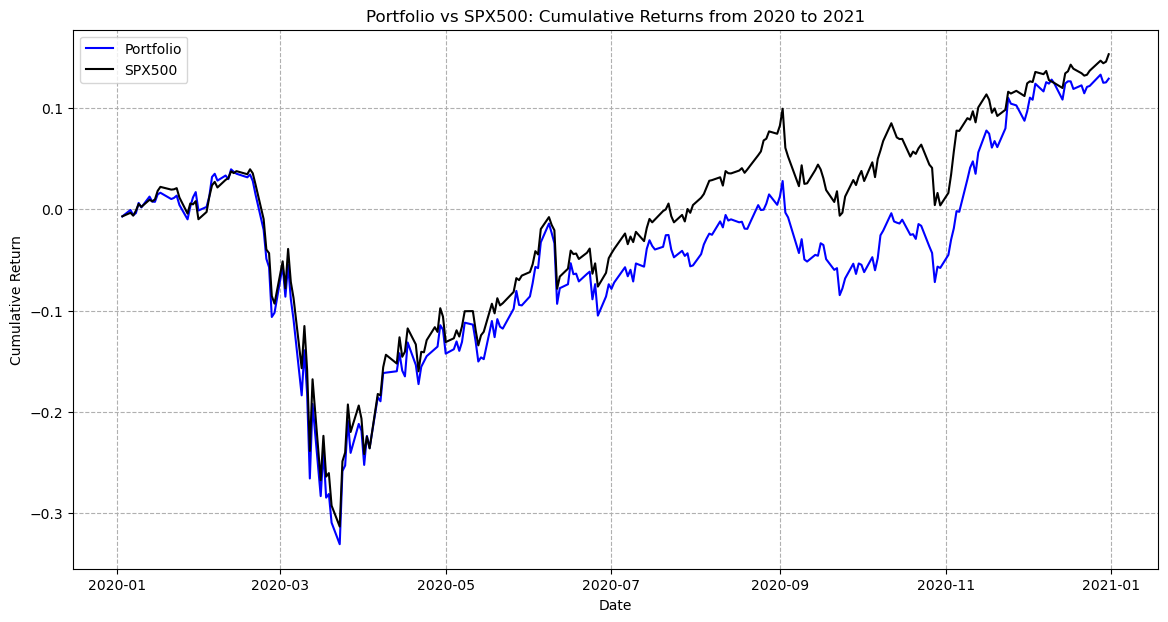

[**********            20%%                      ]  2 of 10 completed

Performance du Portefeuille de 2020 à 2021 : 12.88%
Performance du Benchmark (SPX500) de 2020 à 2021 : 15.29%

Sharpe Ratio du Portefeuille de 2020 à 2021 : -0.40
Sharpe Ratio du Benchmark (SPX500) de 2020 à 2021 : -0.42



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


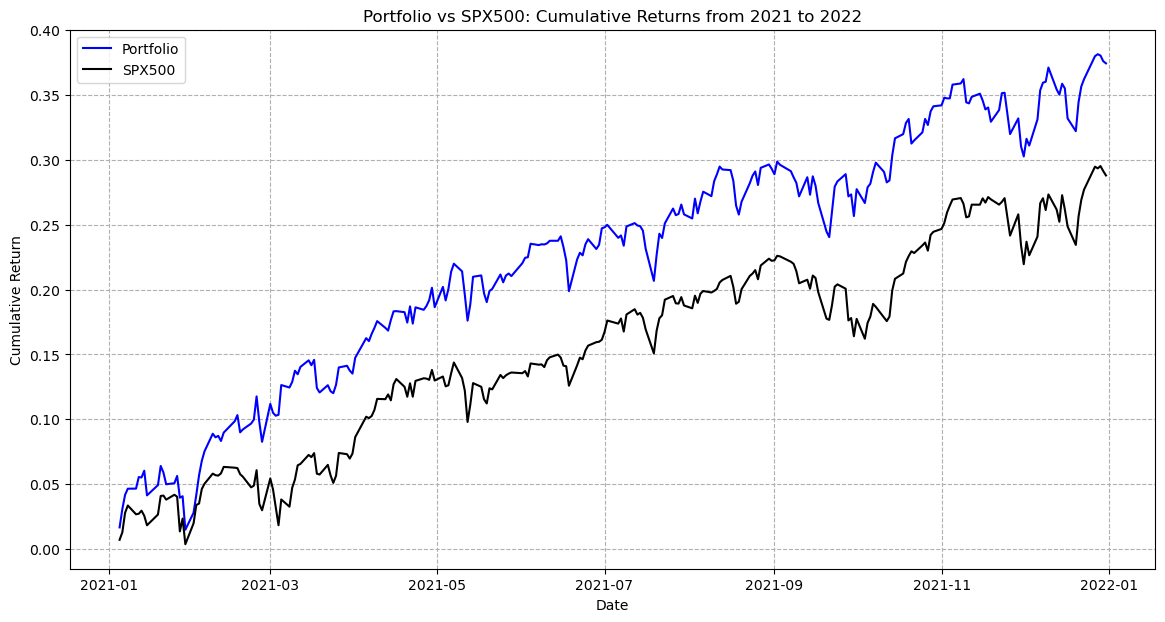

[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2021 à 2022 : 37.43%
Performance du Benchmark (SPX500) de 2021 à 2022 : 28.79%

Sharpe Ratio du Portefeuille de 2021 à 2022 : -1.00
Sharpe Ratio du Benchmark (SPX500) de 2021 à 2022 : -1.09



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


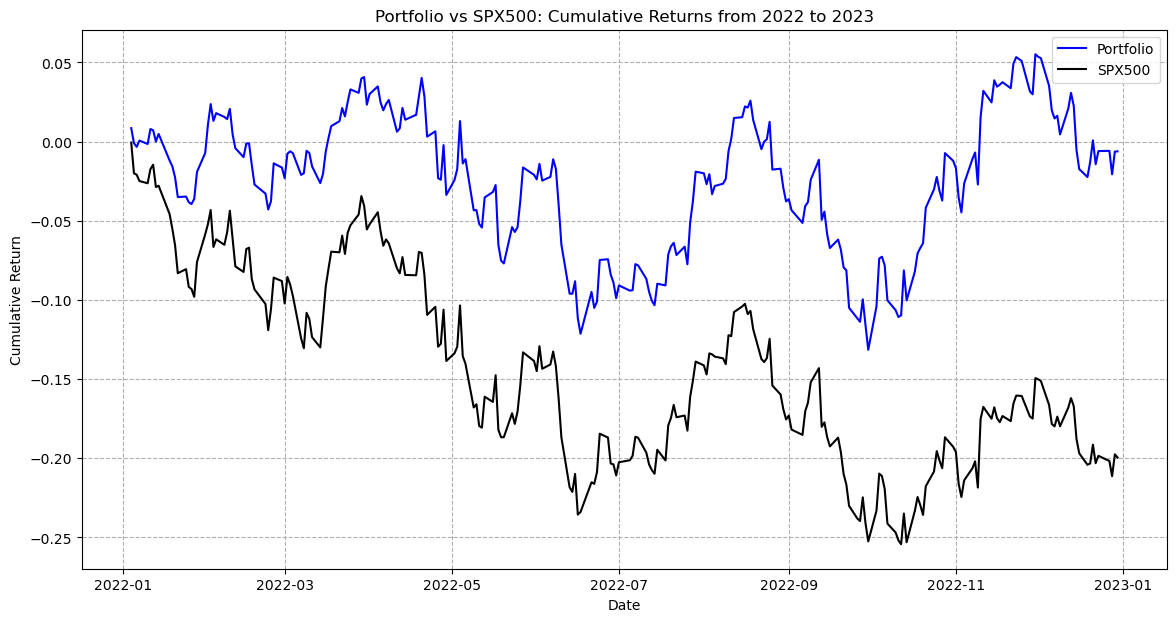

[**********************50%%                      ]  5 of 10 completed

Performance du Portefeuille de 2022 à 2023 : -0.62%
Performance du Benchmark (SPX500) de 2022 à 2023 : -19.95%

Sharpe Ratio du Portefeuille de 2022 à 2023 : -0.73
Sharpe Ratio du Benchmark (SPX500) de 2022 à 2023 : -0.71



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


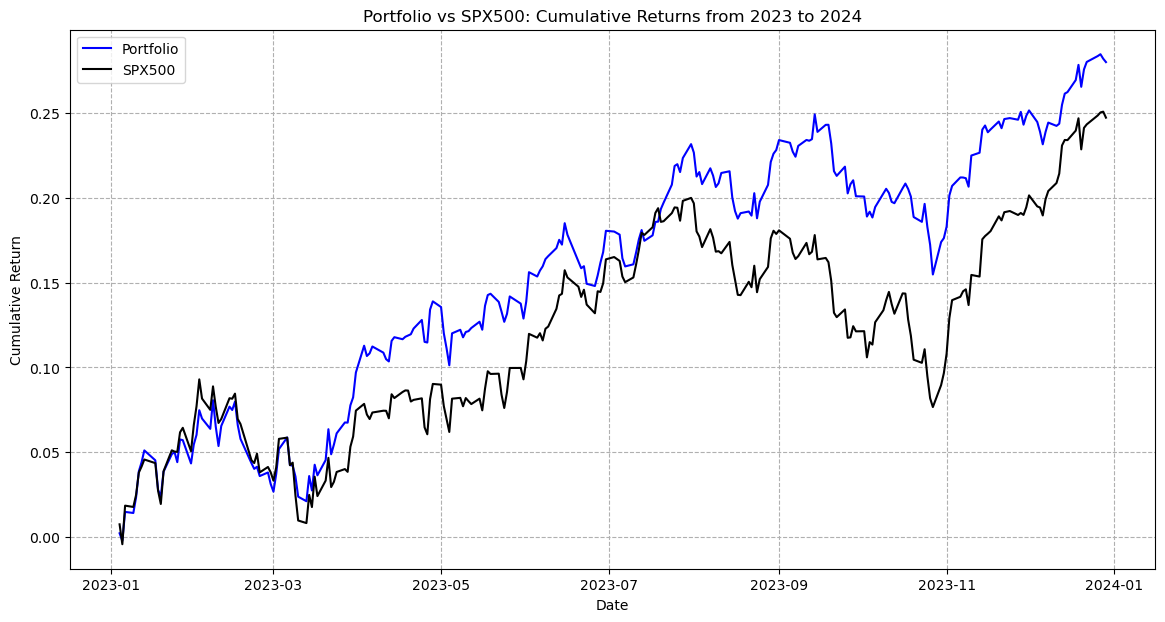

Performance du Portefeuille de 2023 à 2024 : 28.01%
Performance du Benchmark (SPX500) de 2023 à 2024 : 24.73%

Sharpe Ratio du Portefeuille de 2023 à 2024 : -1.21
Sharpe Ratio du Benchmark (SPX500) de 2023 à 2024 : -1.10



In [135]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
    
    # Step 1: Download historical data for the portfolio and CAC 40 index for the 1-year period
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^GSPC", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    # Step 2: Calculate daily returns for each stock in the portfolio
    portfolio_returns = portfolio_data.pct_change()
    
    # Step 3: Calculate the weighted portfolio return by summing the weighted returns of individual stocks
    portfolio_weighted_return = portfolio_returns.dot(weights)
    
    # Step 4: Calculate the daily returns for the benchmark
    benchmark_returns = benchmark_data.pct_change()
    
    # Step 5: Calculate cumulative returns for both the portfolio and the benchmark
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    
    # Step 6: Plot the cumulative returns for comparison
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_cumulative_return, label="Portfolio", color="blue")
    plt.plot(benchmark_cumulative_return, label="SPX500", color="black")
    plt.title(f"Portfolio vs SPX500: Cumulative Returns from {start_year} to {end_year}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True, linestyle="--")
    plt.show()
    
    # Step 7: Calculate and print the final performance in percentage for the portfolio and benchmark
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (SPX500) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

    # Step 8: Calculate Sharpe Ratio for the Portfolio
    excess_portfolio_returns = portfolio_weighted_return - risk_free_rate
    sharpe_ratio_portfolio = excess_portfolio_returns.mean() / excess_portfolio_returns.std()
    
    # Step 9: Calculate Sharpe Ratio for the Benchmark (CAC 40)
    excess_benchmark_returns = benchmark_returns - risk_free_rate
    sharpe_ratio_benchmark = excess_benchmark_returns.mean() / excess_benchmark_returns.std()
    
    # Print the Sharpe Ratios for comparison
    print(f"Sharpe Ratio du Portefeuille de {start_year} à {end_year} : {sharpe_ratio_portfolio:.2f}")
    print(f"Sharpe Ratio du Benchmark (SPX500) de {start_year} à {end_year} : {sharpe_ratio_benchmark:.2f}\n")

In [136]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
 
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^GSPC", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    portfolio_returns = portfolio_data.pct_change()
    portfolio_weighted_return = portfolio_returns.dot(weights)
    benchmark_returns = benchmark_data.pct_change()
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (SPX500 de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2010 à 2011 : 11.15%
Performance du Benchmark (SPX500 de 2010 à 2011 : 11.00%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2011 à 2012 : 4.94%
Performance du Benchmark (SPX500 de 2011 à 2012 : -1.12%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2012 à 2013 : 13.19%
Performance du Benchmark (SPX500 de 2012 à 2013 : 11.68%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2013 à 2014 : 24.54%
Performance du Benchmark (SPX500 de 2013 à 2014 : 26.39%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2014 à 2015 : 7.58%
Performance du Benchmark (SPX500 de 2014 à 2015 : 12.39%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************70%%********              ]  7 of 10 completed

Performance du Portefeuille de 2015 à 2016 : 0.30%
Performance du Benchmark (SPX500 de 2015 à 2016 : -0.69%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2016 à 2017 : 19.87%
Performance du Benchmark (SPX500 de 2016 à 2017 : 11.24%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2017 à 2018 : 11.72%
Performance du Benchmark (SPX500 de 2017 à 2018 : 18.42%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*******************   40%%                      ]  4 of 10 completed

Performance du Portefeuille de 2018 à 2019 : -14.03%
Performance du Benchmark (SPX500 de 2018 à 2019 : -7.01%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************80%%************          ]  8 of 10 completed

Performance du Portefeuille de 2019 à 2020 : 37.06%
Performance du Benchmark (SPX500 de 2019 à 2020 : 28.71%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[**********************60%%***                   ]  6 of 10 completed

Performance du Portefeuille de 2020 à 2021 : 12.88%
Performance du Benchmark (SPX500 de 2020 à 2021 : 15.29%



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed

Performance du Portefeuille de 2021 à 2022 : 37.43%
Performance du Benchmark (SPX500 de 2021 à 2022 : 28.79%




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed

Performance du Portefeuille de 2022 à 2023 : -0.62%
Performance du Benchmark (SPX500 de 2022 à 2023 : -19.95%




[*********************100%%**********************]  1 of 1 completed


Performance du Portefeuille de 2023 à 2024 : 28.01%
Performance du Benchmark (SPX500 de 2023 à 2024 : 24.73%



In [137]:
# List of portfolio performance from 2010 to 2024
portfolio_performance = [
    11.15, 4.94, 13.19, 24.54, 7.58, 0.30, 19.87, 11.72, -14.03, 37.06, 12.88, 37.43, -0.62, 28.01
]

average_portfolio_performance = sum(portfolio_performance) / len(portfolio_performance)

average_portfolio_performance

13.858571428571429

# - Part III : Simulation d'investissement (In-sample)

**Période de placement** : janvier 2010 à janvier 2024

Dans cette simulation, nous nous plaçons au début de l'année 2010, sans prendre en compte les performances futures des titres. Nous avons sélectionné les 10 plus grandes capitalisations boursières du S&P 500 à cette date, sans ajuster la composition du portefeuille au fil des ans (une stratégie qui aurait potentiellement amélioré la performance et réduit le risque).

L'horizon d'investissement couvre 14 ans, de 2010 à 2024, avec un apport mensuel de 500 euros réparti de manière équipondérée sur les 10 titres du portefeuille (chaque titre ayant un poids égal).

Cette simulation repose sur les performances réelles observées pour ces titres après 2010. Bien que nous aurions pu utiliser des performances moyennes issues de la littérature académique ou des données historiques, l'objectif ici n'est pas de prédire l'avenir, mais de répondre à la question suivante : **"Comment aurait évolué notre portefeuille de 2010 à 2024 si nous avions investi 10 000 euros dans un portefeuille équipondéré composé des 10 plus grandes capitalisations du S&P 500 ?"**

Cette approche repose sur l’utilisation des performances observées historiquement pour ces titres. Si l'on envisage une simulation pour la période 2024-2040, il conviendrait d'utiliser des taux de performance historiques moyens, comme +10 % ou +15 %.

In [139]:
# Initial investment and monthly contribution 

initial_investment = 10000  # euros
monthly_contribution = 500  # euros
years = len(portfolio_performance)  # 14 years of performance : from 2010 to 2024
months = years * 12

# Convert portfolio performance into monthly return and calculate the average monthly return
monthly_performance = [(1 + (p / 100))**(1/12) - 1 for p in portfolio_performance]
portfolio_value = initial_investment


for i in range(len(monthly_performance)):
    annual_return = monthly_performance[i]
    for month in range(12):
        # Monthly portfolio increase with contribution and growth
        portfolio_value = (portfolio_value + monthly_contribution) * (1 + annual_return)

portfolio_value

299820.70961771137

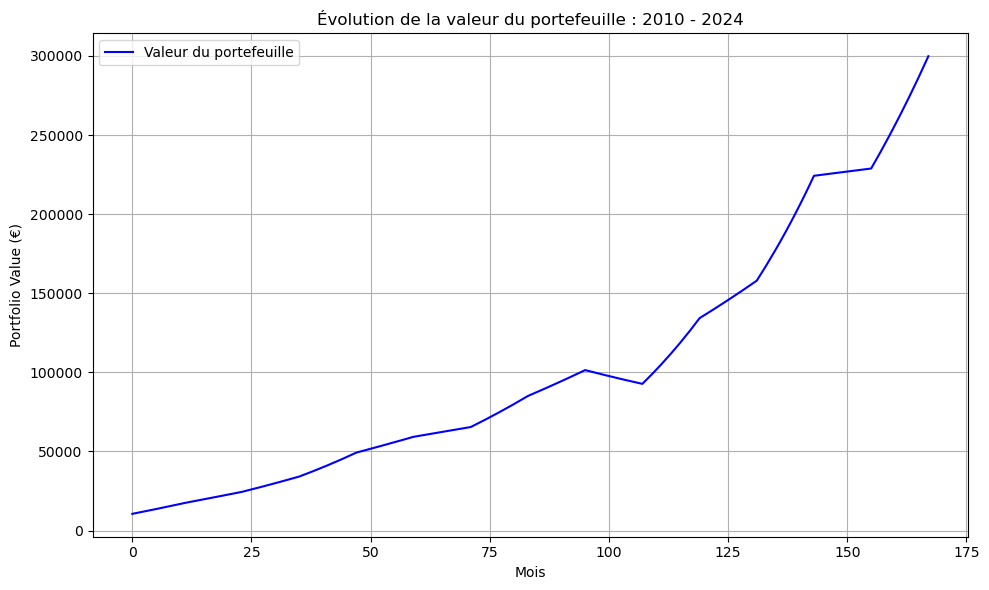

In [140]:
#PLOTING

portfolio_value = initial_investment
portfolio_values = []  
time_periods = [] 

# Loop through each year and month, calculating portfolio value
for i in range(len(monthly_performance)):
    annual_return = monthly_performance[i]
    for month in range(12):
        portfolio_value = (portfolio_value + monthly_contribution) * (1 + annual_return)
        portfolio_values.append(portfolio_value)
        time_periods.append(i * 12 + month)

plt.figure(figsize=(10, 6))
plt.plot(time_periods, portfolio_values, label='Valeur du portefeuille', color='blue')
plt.title("Évolution de la valeur du portefeuille : 2010 - 2024")
plt.xlabel("Mois")
plt.ylabel("Portfolio Value (€)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()